In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'/Users/patrickhedley-miller/code/pyhton/dataprojects/pandas/movies'

In [3]:
movies = pd.read_csv('Movie-Ratings.csv')

In [4]:
len(movies)

559

In [5]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movies.columns = ['film', 'genre', 'criticRating', 'audienceRating', 'budget', 'year']

In [7]:
movies.head()

,film,genre,criticRating,audienceRating,budget,year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.describe()

,criticRating,audienceRating,budget,year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
film              559 non-null object
genre             559 non-null object
criticRating      559 non-null int64
audienceRating    559 non-null int64
budget            559 non-null int64
year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
# CHANGES TYPE OF VARIABLE FORM OBJECT TO CATEGORY

movies.film = movies.film.astype('category')
movies.genre = movies.genre.astype('category')
movies.year = movies.year.astype('category')

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
film              559 non-null category
genre             559 non-null category
criticRating      559 non-null int64
audienceRating    559 non-null int64
budget            559 non-null int64
year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [12]:
movies.genre.cat.categories
# movies.genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [13]:
movies.year.cat.categories
# movies.film.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

-------------

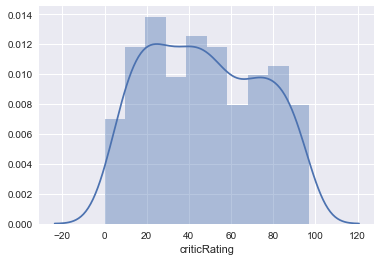

In [14]:
vis1 = sns.distplot(movies['criticRating'], bins=10)

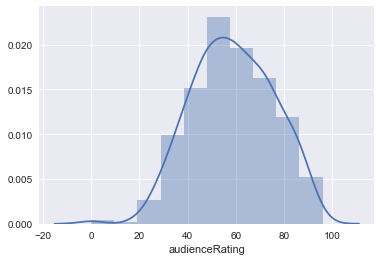

In [15]:
vis2 = sns.distplot(movies['audienceRating'], bins=10)

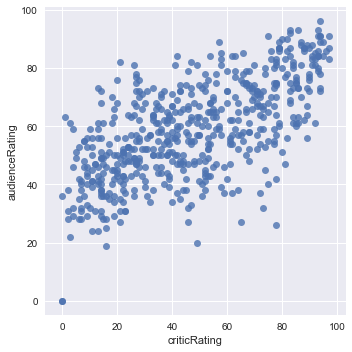

In [16]:
vis3 = sns.lmplot(data = movies, x = 'criticRating', y = 'audienceRating', fit_reg = False)

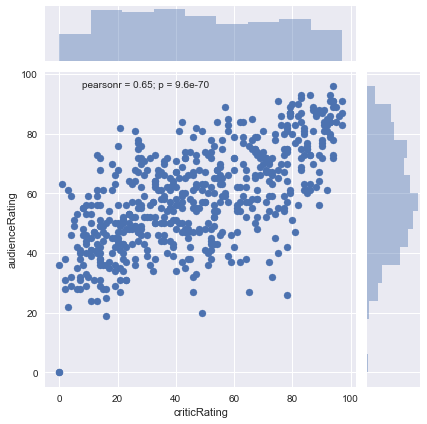

In [17]:
# JOINTPLOT PUTS X AGAINST Y AND SHOWS DISTRO OF EACH

j1 = sns.jointplot(data = movies, x = 'criticRating', y = 'audienceRating')

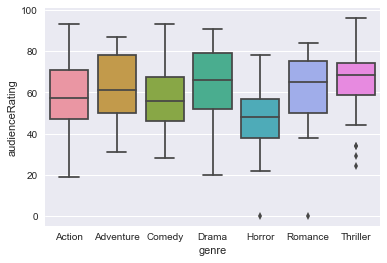

In [18]:
vis3 = sns.boxplot(data = movies, x = 'genre', y = 'audienceRating')


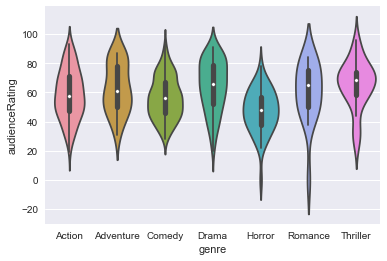

In [19]:
violin1 = sns.violinplot(data = movies, x = 'genre', y = 'audienceRating')

------

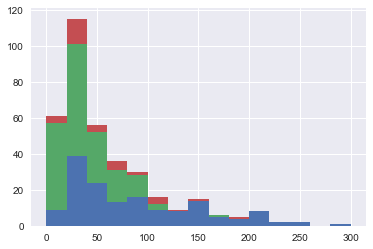

In [20]:
# com = movies.genre == 'Comedy'
# act = movies.genre == 'Action'
# thril = movies.genre == 'Thriller'

plt.hist([movies[movies.genre == 'Action'].budget,
          movies[movies.genre == 'Comedy'].budget, 
          movies[movies.genre == 'Thriller'].budget],
        bins = 15, stacked=True)
plt.show()

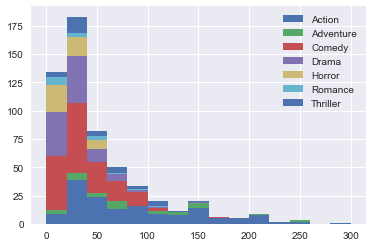

In [21]:
li1 = []
labels1 = []
for gen in movies.genre.cat.categories:
    li1.append(movies[movies.genre == gen].budget)
    labels1.append(gen)
# print(li1)
h1 = plt.hist(li1, bins = 15, stacked=True, label=labels1)
plt.legend()
plt.show()



---------

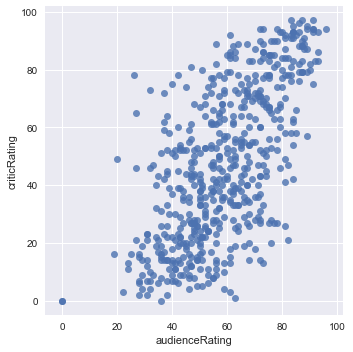

In [22]:
# KERNAL DENSITY ESTIMATE COMPARISON

kdeComp1 = sns.lmplot(data=movies, x='audienceRating', y='criticRating',\
                     fit_reg=False)

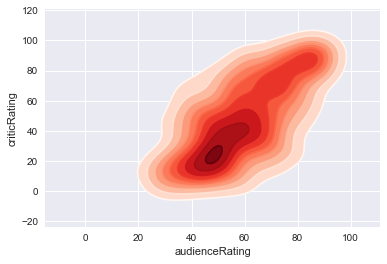

In [23]:
# AUDIENCE TO CRITIC KDE with oulinte overlay

kde1 = sns.kdeplot(movies.audienceRating, movies.criticRating, \
                  cmap='Reds')

kde1 = sns.kdeplot(movies.audienceRating, movies.criticRating, \
                  shade=True, shade_lowest=False, cmap='Reds')

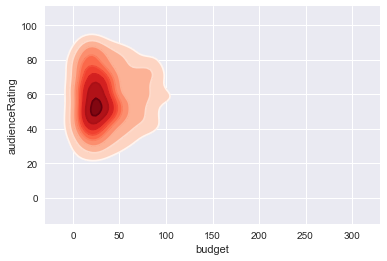

In [24]:
# AUDIENCE TO BUDGET KDE

kde2 = sns.kdeplot(movies.budget, movies.audienceRating, \
                  shade=True, shade_lowest=False, cmap='Reds')

kde2 = sns.kdeplot(movies.budget, movies.audienceRating, \
                  cmap='Reds')

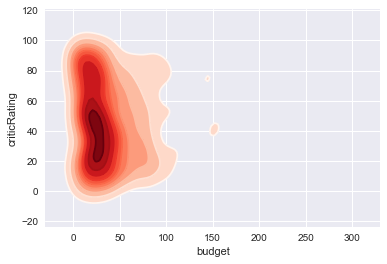

In [25]:
# CRITIC TO BUDGET KDE

kde2 = sns.kdeplot(movies.budget, movies.criticRating, \
                  shade=True, shade_lowest=False, cmap='Reds')

kde2 = sns.kdeplot(movies.budget, movies.criticRating, \
                  cmap='Reds')



In [26]:
# SUB PLOT

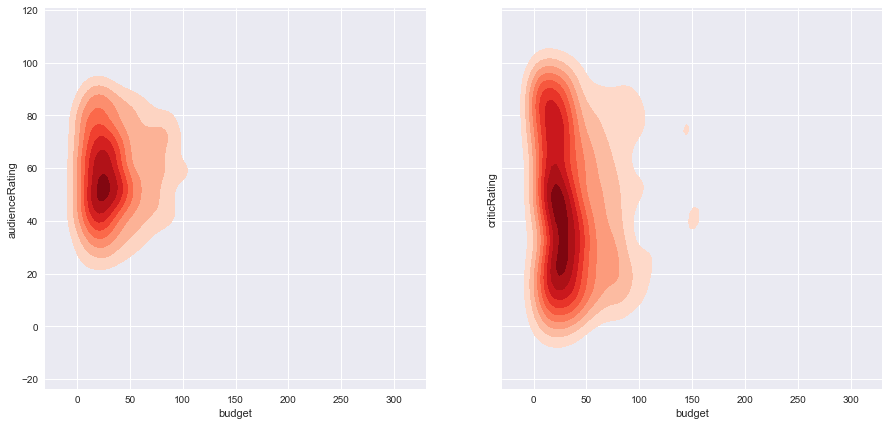

In [27]:
# SHAREX SHAREY TO STANDARDISE PLOTS. 
# SETX TO SET X VALUE


f, axes = plt.subplots(1,2, figsize=(15,7), sharex=True, sharey=True)
sillyOne = sns.kdeplot(movies.budget, movies.audienceRating, shade=True, shade_lowest=False, cmap="Reds", ax=axes[0])
sillyTwo = sns.kdeplot(movies.budget, movies.criticRating, shade=True, shade_lowest=False, cmap="Reds", ax=axes[1])


# STYLING
sharex=True
# k1.set(xlim=(-20, 180))

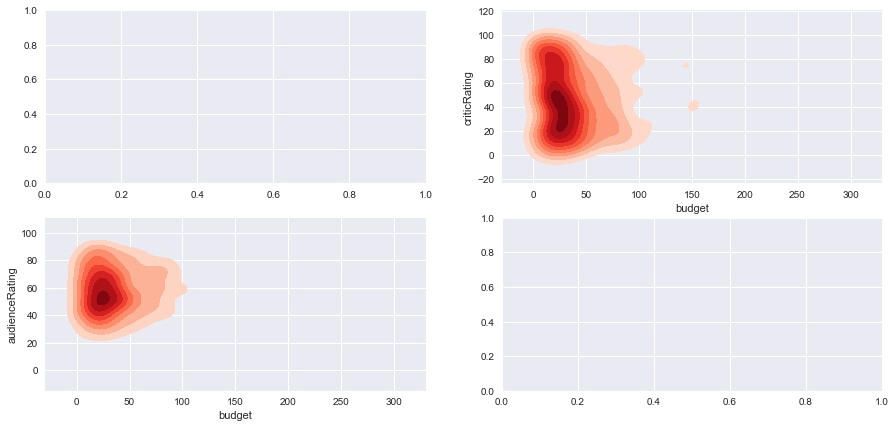

In [28]:
# TO CONVERT INTO MATRIX ADD 2,2 FOR LEVELS AND INCREASE AX=AXES

f, axes = plt.subplots(2,2, figsize=(15,7))
k1 = sns.kdeplot(movies.budget, movies.audienceRating, shade=True, shade_lowest=False, cmap="Reds", ax=axes[1,0])
k2 = sns.kdeplot(movies.budget, movies.criticRating, shade=True, shade_lowest=False, cmap="Reds", ax=axes[0,1])

--------------

In [29]:
# FACET GRIDS provide way of splitting up busy chart

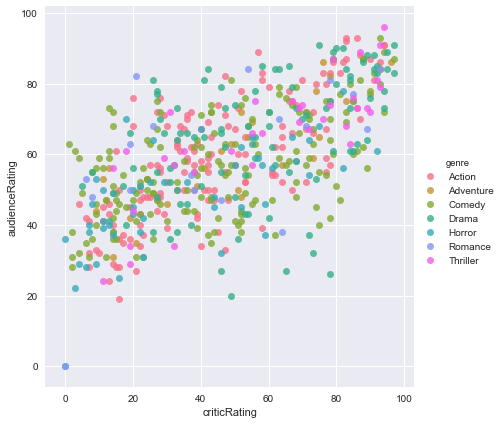

In [30]:
lmVis = sns.lmplot(data=movies, x='criticRating', y='audienceRating', hue='genre', fit_reg=False,
                  size=6)

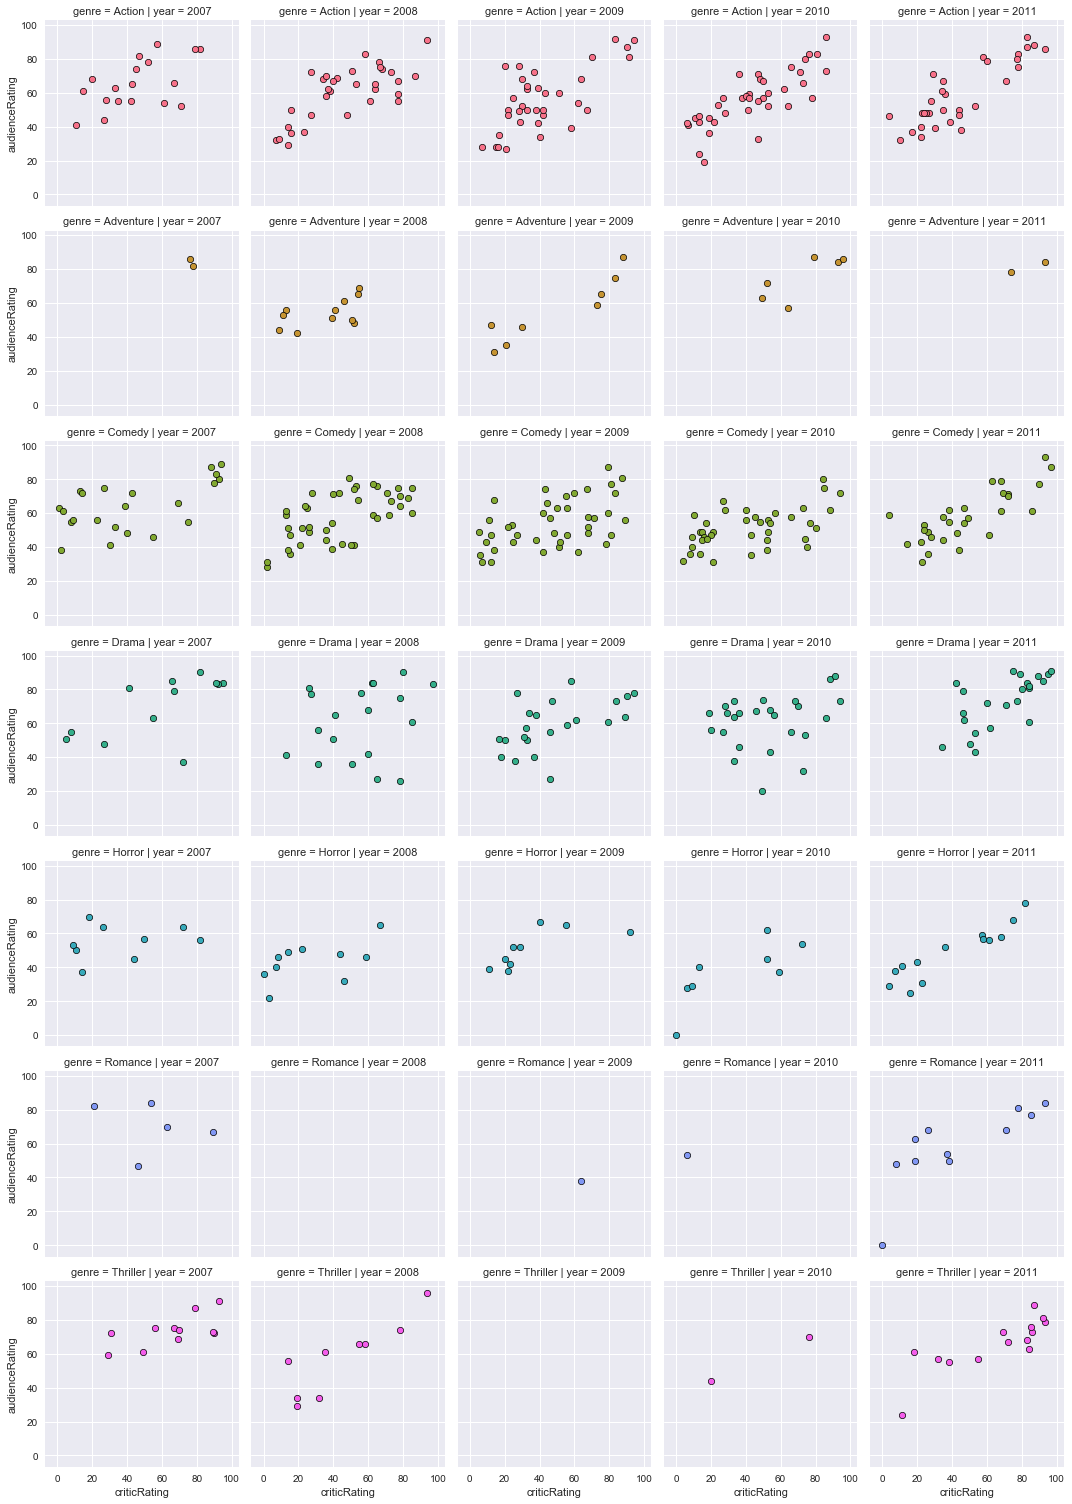

In [31]:
# CREATES MATRIX OF GRAPHS FOR X AND Y VARIABLE STORED AS G
# GMAP USED TO MAP OTHER PLOTS ONTO MATRIX

g = sns.FacetGrid(data=movies, row='genre', col='year', hue='genre')
kws = dict(s=40, linewidth=0.7, edgecolor='black')
g = g.map(plt.scatter, 'criticRating', 'audienceRating', **kws)


-------

AttributeError: 'FacetGrid' object has no attribute 'show'

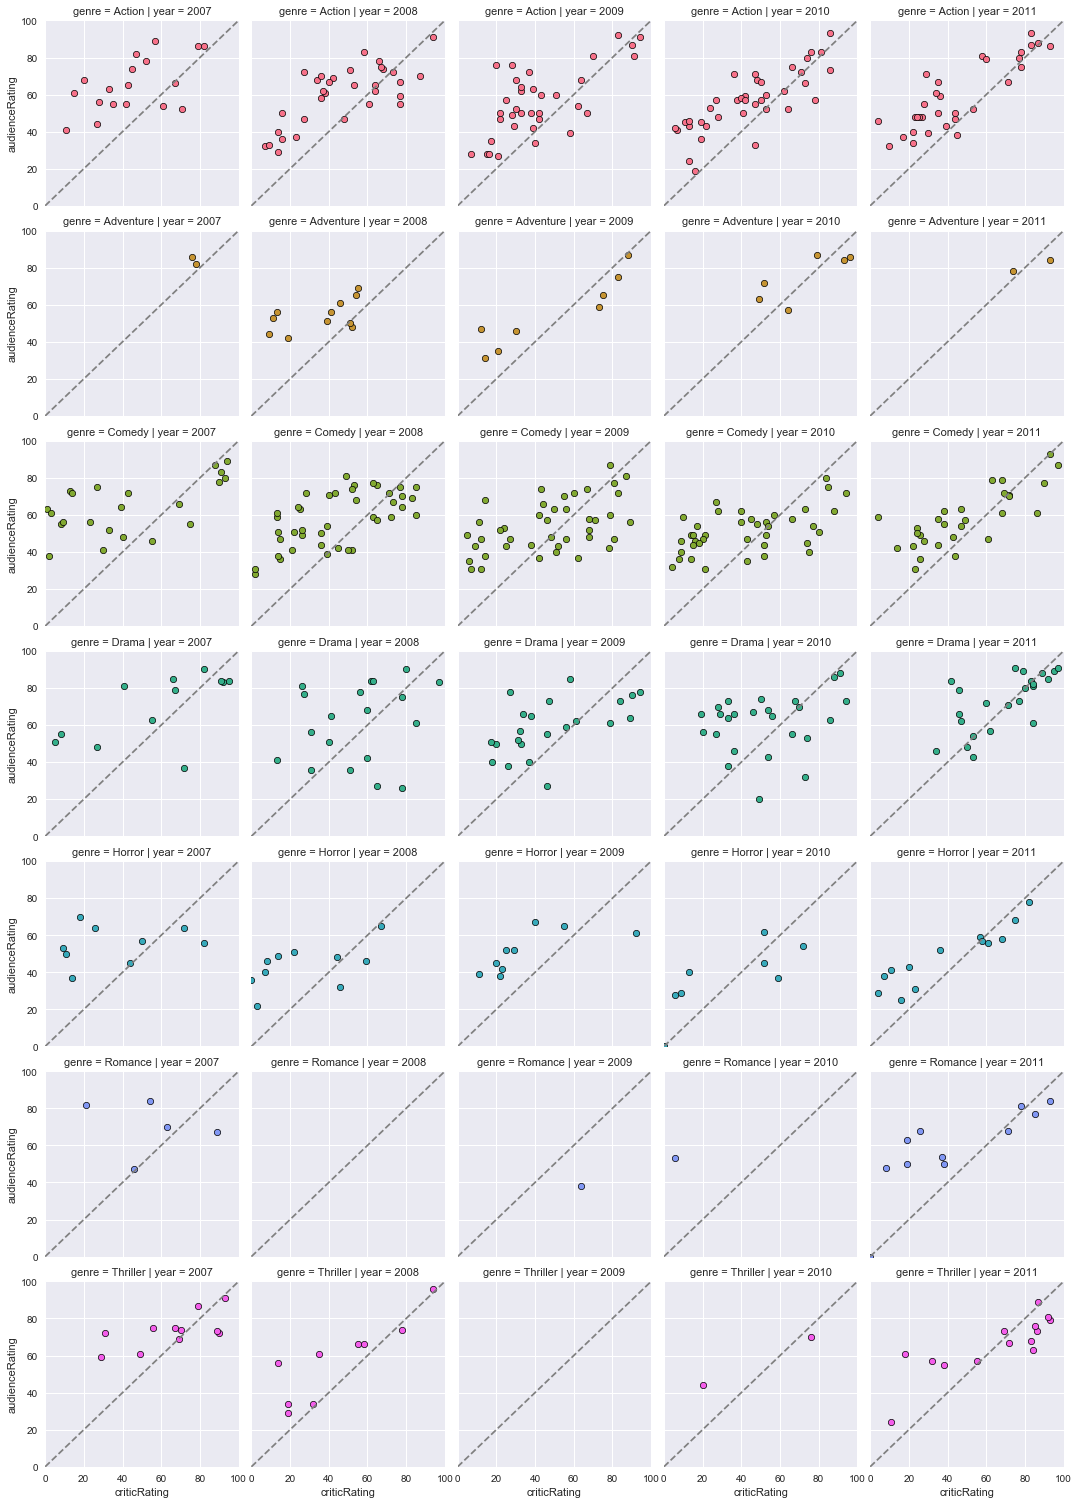

In [32]:
# ADD DELIMITOR
# CRONTROL X Y AXES

h = sns.FacetGrid(data=movies, row='genre', col='year', hue='genre')
kws = dict(s=40, linewidth=0.7, edgecolor='black')
h = h.map(plt.scatter, 'criticRating', 'audienceRating', **kws)
for ax in h.axes.flat:
    ax.plot((0,100),(0,100), c="grey", ls="--")
    

# STYLING
h.set(xlim=(0, 100), ylim=(0, 100))
h.show


In [ ]:
# DASHBOARDS
sns.set_style('dark', {'axes.facecolor':'black'})

f, axes = plt.subplots(2,2, figsize=(15,7))

# plot[0,0]
box1 = sns.violinplot(data = movies, x = 'year', y = 'budget',\
#                        palette='cool', ax=axes[0,0])
                       palette='YlOrRd', ax=axes[0,0])
# plot[0,1]
k1 = sns.kdeplot(movies.criticRating, movies.audienceRating, cmap='gist_earth_r', \
                        ax=axes[0,1])
k1 = sns.kdeplot(movies.criticRating, movies.audienceRating, \
                      shade=True, shade_lowest=False, cmap="Blues_r", ax=axes[0,1])

# plot[1,0]
k2 = sns.kdeplot(movies.budget, movies.audienceRating, \
                    cmap="cool", ax=axes[1,0])
k2 = sns.kdeplot(movies.budget, movies.audienceRating, \
                 shade=True, shade_lowest=True, cmap="inferno", ax=axes[1,0])


# plot[1,1]
k3  = sns.kdeplot(movies.budget, movies.criticRating, \
                  cmap="cool", ax=axes[1,1])
k3  = sns.kdeplot(movies.budget, movies.criticRating, shade=True, \
                  shade_lowest=True, cmap="inferno", ax=axes[1,1])

# STYLE
k1.set(xlim=(-20,175))
k2.set(xlim=(-20,175))
k3.set(xlim=(-20,175))

# HISTPLOT TEST
# hist1 = axes[0,1].hist(data = movies, x = 'criticRating')

# JOINTPLOT TEST
# j2 = sns.jointplot(data = movies, x = 'criticRating', y = 'audienceRating', ax=axes[0,0])

# LMPLOT TEST
# lm1 = sns.lmplot(data = movies, x ='audienceRating', y = 'criticRating', fit_reg=False, ax=axes[0,1])

-----

In [ ]:
sns.set_style('darkgrid')

li1 = []
labels1 = []
for gen in movies.genre.cat.categories:
    li1.append(movies[movies.genre == gen].budget)
    labels1.append(gen)

# f, axes = plt.subplots(figsize=(15,7))
f, axes = plt.subplots()
f.set_size_inches(11,8)


h1 = plt.hist(li1, bins = 15, stacked=True, label=labels1)
plt.xlabel('Budget', fontsize=15, color='Green')
plt.xticks(fontsize=10)
plt.ylabel('Number of Films', fontsize=15, color='Red')
plt.yticks(fontsize=10)

plt.title('Budgets per Genre', fontsize=25)
plt.legend(frameon=True, fancybox=True, shadow=True, prop={'size':15})
plt.show()
